In [ ]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving education.csv to education.csv
Saving income.csv to income.csv
Saving police_killings_test.csv to police_killings_test.csv
Saving police_killings_train.csv to police_killings_train.csv
Saving poverty.csv to poverty.csv
Saving share_race_by_city.csv to share_race_by_city.csv


In [ ]:
# load files
edu = pd.read_csv('education.csv', engine='python')
income = pd.read_csv('income.csv', engine='python')
train = pd.read_csv('police_killings_train.csv', engine='python')
test = pd.read_csv('police_killings_test.csv', engine='python')
poverty = pd.read_csv('poverty.csv', engine='python')
race = pd.read_csv('share_race_by_city.csv', engine='python')

In [ ]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2028 non-null   int64  
 1   name                     2028 non-null   object 
 2   date                     2028 non-null   object 
 3   manner_of_death          2028 non-null   object 
 4   armed                    2022 non-null   object 
 5   age                      1991 non-null   float64
 6   gender                   2028 non-null   object 
 7   race                     1937 non-null   object 
 8   city                     2028 non-null   object 
 9   state                    2028 non-null   object 
 10  signs_of_mental_illness  2028 non-null   bool   
 11  threat_level             2028 non-null   object 
 12  flee                     2001 non-null   object 
 13  body_camera              2028 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       507 non-null    int64  
 1   name                     507 non-null    object 
 2   date                     507 non-null    object 
 3   manner_of_death          507 non-null    object 
 4   armed                    504 non-null    object 
 5   age                      467 non-null    float64
 6   gender                   507 non-null    object 
 7   race                     403 non-null    object 
 8   city                     507 non-null    object 
 9   state                    507 non-null    object 
 10  signs_of_mental_illness  507 non-null    bool   
 11  threat_level             507 non-null    object 
 12  flee                     469 non-null    object 
 13  body_camera              507 non-null    bool   
dtypes: bool(2), float64(1), in

In [ ]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
# column name conformity
race.rename(columns={'Geographic area': 'Geographic Area'},inplace=True)
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
# merge poverty, edu, race, and income based on Geographic Area and City
keys = ['Geographic Area', 'City']
merged = pd.merge(edu, income,on=keys)
merged = pd.merge(merged, poverty, on=keys)
merged = pd.merge(merged, race, on=keys)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   City                   29115 non-null  object
 2   percent_completed_hs   29115 non-null  object
 3   Median Income          29064 non-null  object
 4   poverty_rate           29115 non-null  object
 5   share_white            29115 non-null  object
 6   share_black            29115 non-null  object
 7   share_native_american  29115 non-null  object
 8   share_asian            29115 non-null  object
 9   share_hispanic         29115 non-null  object
dtypes: object(10)
memory usage: 2.4+ MB


In [ ]:
# convert strings to numeric data and set all non-sense data to null
target = merged.iloc[:,2:10]
for columnName in target:
    merged[columnName] = pd.to_numeric(merged[columnName], errors='coerce')
merged.isnull().sum()

Geographic Area             0
City                        0
percent_completed_hs      191
Median Income            1905
poverty_rate              195
share_white                19
share_black                19
share_native_american      19
share_asian                19
share_hispanic             19
dtype: int64

In [ ]:
# mean value interpolation: fill missing data with mean value of the state that the data belongs to
merged = merged.fillna(merged.groupby('Geographic Area').transform(lambda x: x.fillna(x.mean())))
merged.isnull().sum()
# merged.dtypes

Geographic Area          0
City                     0
percent_completed_hs     0
Median Income            0
poverty_rate             0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [ ]:
# rename columns for later work
merged.rename(columns={'Geographic Area': 'state', 'City': 'city'}, inplace=True)
merged

,state,city,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,21.2,11207.000000,78.8,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,69.1,25615.000000,29.1,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,78.9,42575.000000,25.5,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,81.4,37083.000000,30.7,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,68.6,21667.000000,42.0,13.2,86.5,0.0,0.0,0.3
...,...,...,...,...,...,...,...,...,...,...
29110,WY,Woods Landing-Jelm CDP,100.0,60874.993421,18.6,95.9,0.0,0.0,2.1,0.0
29111,WY,Worland city,85.6,41523.000000,15.3,89.9,0.3,1.3,0.6,16.6
29112,WY,Wright town,89.2,77114.000000,5.9,94.5,0.1,1.4,0.2,6.2
29113,WY,Yoder town,79.4,37500.000000,5.4,97.4,0.0,0.0,0.0,4.0


### Exploring correlations

In [ ]:
ex=merged
row['Killed']=merged.groupby(["state", "city"]).size()
row

state                                                                   AL
city                                                         Saraland city
percent_completed_hs                                                  85.4
Median Income                                                        52621
poverty_rate                                                          11.2
share_white                                                           83.7
share_black                                                             12
share_native_american                                                  0.8
share_asian                                                            0.6
share_hispanic                                                         2.5
Killed                   state  city                  
AK     Adak city...
Name: 468, dtype: object

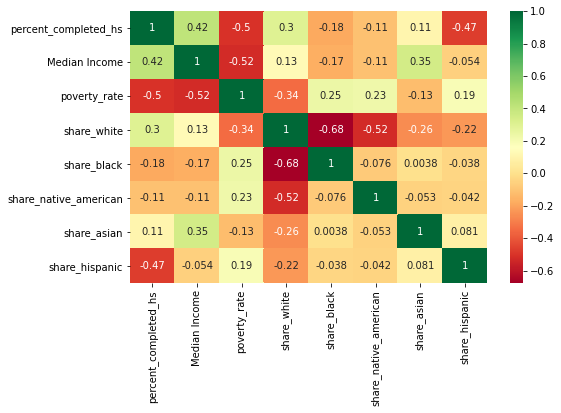

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(merged.drop(['state', 'city'],axis=1).corr(), annot=True, cmap="RdYlGn")
plt.show()

##EDA

In [ ]:
train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,H,Kuna,ID,False,attack,Car,False


In [ ]:
summaries = train['armed'].unique()
summary_mapping = {key:i for key,i in zip(summaries, range(len(summaries)))}
summary_mapping

{'Taser': 21,
 'air conditioner': 64,
 'ax': 39,
 'baseball bat': 41,
 'baseball bat and fireplace poker': 36,
 'baton': 49,
 'bayonet': 55,
 'bean-bag gun': 35,
 'beer bottle': 34,
 'blunt object': 24,
 'box cutter': 12,
 'brick': 40,
 'carjack': 29,
 'chain': 30,
 'chain saw': 43,
 "contractor's level": 31,
 'cordless drill': 18,
 'crossbow': 19,
 'crowbar': 60,
 'flagpole': 16,
 'flashlight': 48,
 'garden tool': 44,
 'glass shard': 57,
 'gun': 0,
 'gun and knife': 38,
 'guns and explosives': 17,
 'hammer': 7,
 'hand torch': 42,
 'hatchet': 8,
 'hatchet and gun': 52,
 'knife': 4,
 'lawn mower blade': 15,
 'machete': 11,
 'machete and gun': 62,
 'meat cleaver': 27,
 'metal hand tool': 23,
 'metal object': 13,
 'metal pipe': 22,
 'metal pole': 20,
 'metal rake': 59,
 'metal stick': 25,
 'motorcycle': 58,
 'nail gun': 3,
 nan: 28,
 'oar': 61,
 'pick-axe': 47,
 'piece of wood': 54,
 'pipe': 56,
 'pitchfork': 51,
 'pole': 46,
 'pole and knife': 65,
 'rock': 53,
 'scissors': 45,
 'screwdri

In [ ]:
train.isnull().sum() 

id                          0
name                        0
date                        0
manner_of_death             0
armed                       6
age                        37
gender                      0
race                       91
city                        0
state                       0
signs_of_mental_illness     0
threat_level                0
flee                       27
body_camera                 0
dtype: int64

### Dangerous level

In [ ]:
train.value_counts(["city", "state"])

city           state
Los Angeles    CA       31
Phoenix        AZ       24
Houston        TX       22
Chicago        IL       21
Las Vegas      NV       16
                        ..
New City       NY        1
New Castle     CO        1
New Brunswick  NJ        1
Neenah         WI        1
Abingdon       MD        1
Length: 1281, dtype: int64

In [ ]:
train.value_counts(["state"])

state
CA       340
TX       186
FL       122
AZ        93
CO        61
OK        60
GA        59
NC        56
OH        56
IL        51
LA        48
MO        47
TN        45
NM        43
WA        43
PA        43
AL        43
NY        39
VA        38
SC        36
KY        36
IN        35
NV        34
MD        31
OR        30
MI        30
NJ        28
WI        28
MN        28
WV        23
MA        21
AR        20
KS        19
UT        18
MS        17
NE        15
ID        14
AK        11
IA        10
HI         9
MT         9
DC         9
WY         8
SD         7
CT         6
ME         5
DE         5
NH         5
ND         3
VT         3
RI         2
dtype: int64

### Armed

In [ ]:
train.value_counts(["armed"])

armed              
gun                    1114
knife                   304
unarmed                 148
vehicle                 125
undetermined             91
                       ... 
stapler                   1
hand torch                1
pitchfork                 1
tire iron                 1
straight edge razor       1
Length: 65, dtype: int64

Text(0, 0.5, 'Count')

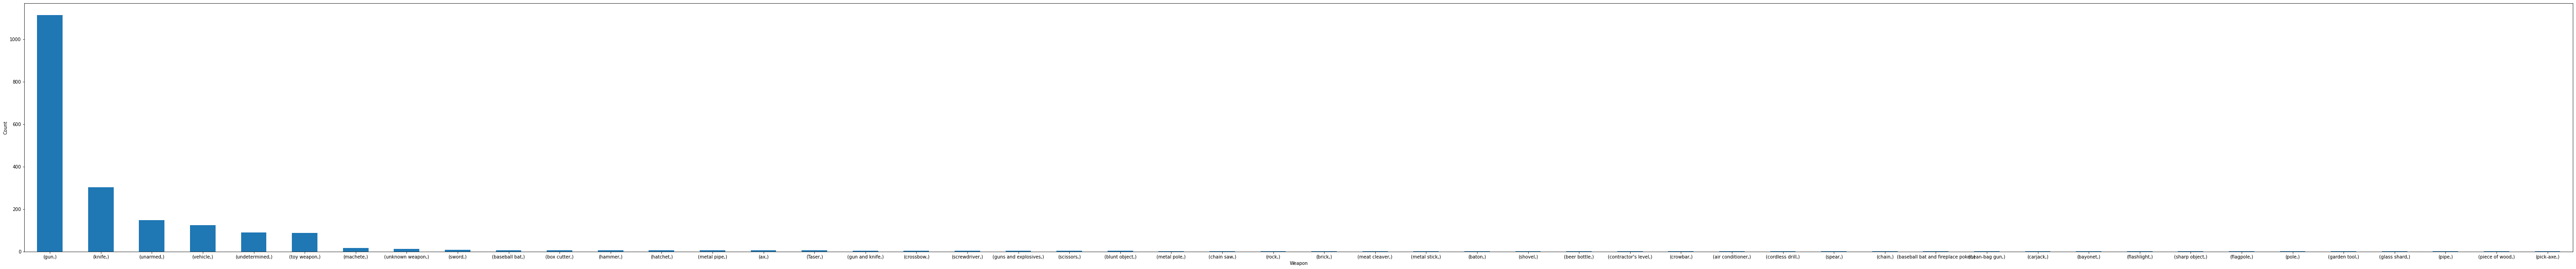

In [ ]:
plt.figure(figsize=(100,10))
ax = train.value_counts(["armed"]).head(50).plot(kind='bar', rot=0)
ax.set_xlabel("Weapon")
ax.set_ylabel("Count")

### Age

#### By all race

In [ ]:
train.value_counts(["age"])

age 
31.0    79
25.0    77
36.0    77
29.0    74
30.0    62
        ..
82.0     1
14.0     1
13.0     1
12.0     1
6.0      1
Length: 71, dtype: int64

Text(0, 0.5, 'Count')

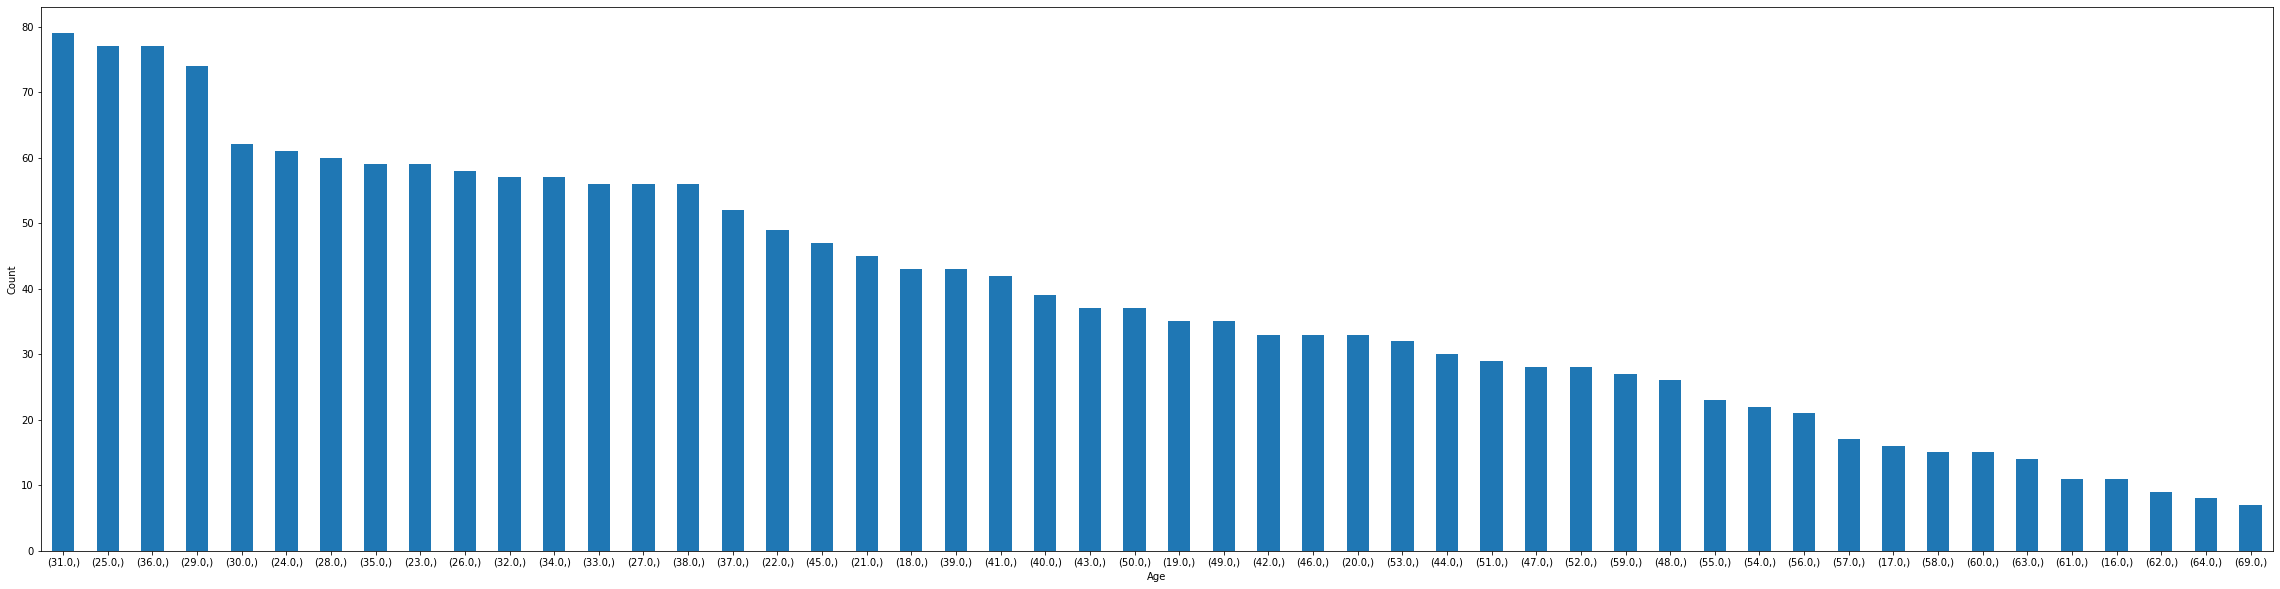

In [ ]:
plt.figure(figsize=(40,10))
ax = train.value_counts(["age"]).head(50).plot(kind='bar', rot=0)
ax.set_xlabel("Age")
ax.set_ylabel("Count")

In [ ]:
train['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

#### Race A

In [ ]:
train[train['race']=='A']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
69,346,Matautu Nuu,28/01/15,shot and Tasered,hammer,35.0,M,A,Stockton,CA,True,attack,Not fleeing,False
155,195,Hung Trieu,01/03/15,shot,gun,35.0,M,A,Houston,TX,False,attack,Not fleeing,False
160,249,Carl Lao,04/03/15,shot,gun,28.0,M,A,Stockton,CA,False,attack,Not fleeing,False
265,359,Joseph Jeremy Weber,08/04/15,shot,knife,28.0,M,A,Sunnyvale,CA,True,other,Not fleeing,False
303,397,Lue Vang,22/04/15,shot,gun,39.0,M,A,Eldorado Springs,CO,False,attack,Not fleeing,False
337,430,Thong Kien Ma,05/05/15,shot,knife,32.0,M,A,South El Monte,CA,False,attack,Not fleeing,False
468,601,Ton Nguyen,02/07/15,shot,knife,60.0,M,A,San Diego,CA,False,other,Not fleeing,False
685,879,William Chau,09/09/15,shot,knife,59.0,M,A,El Monte,CA,False,attack,Not fleeing,False
686,817,Tian Ma,10/09/15,shot,knife,31.0,M,A,Potsdam,NY,False,attack,Not fleeing,False


Text(0, 0.5, 'Count')

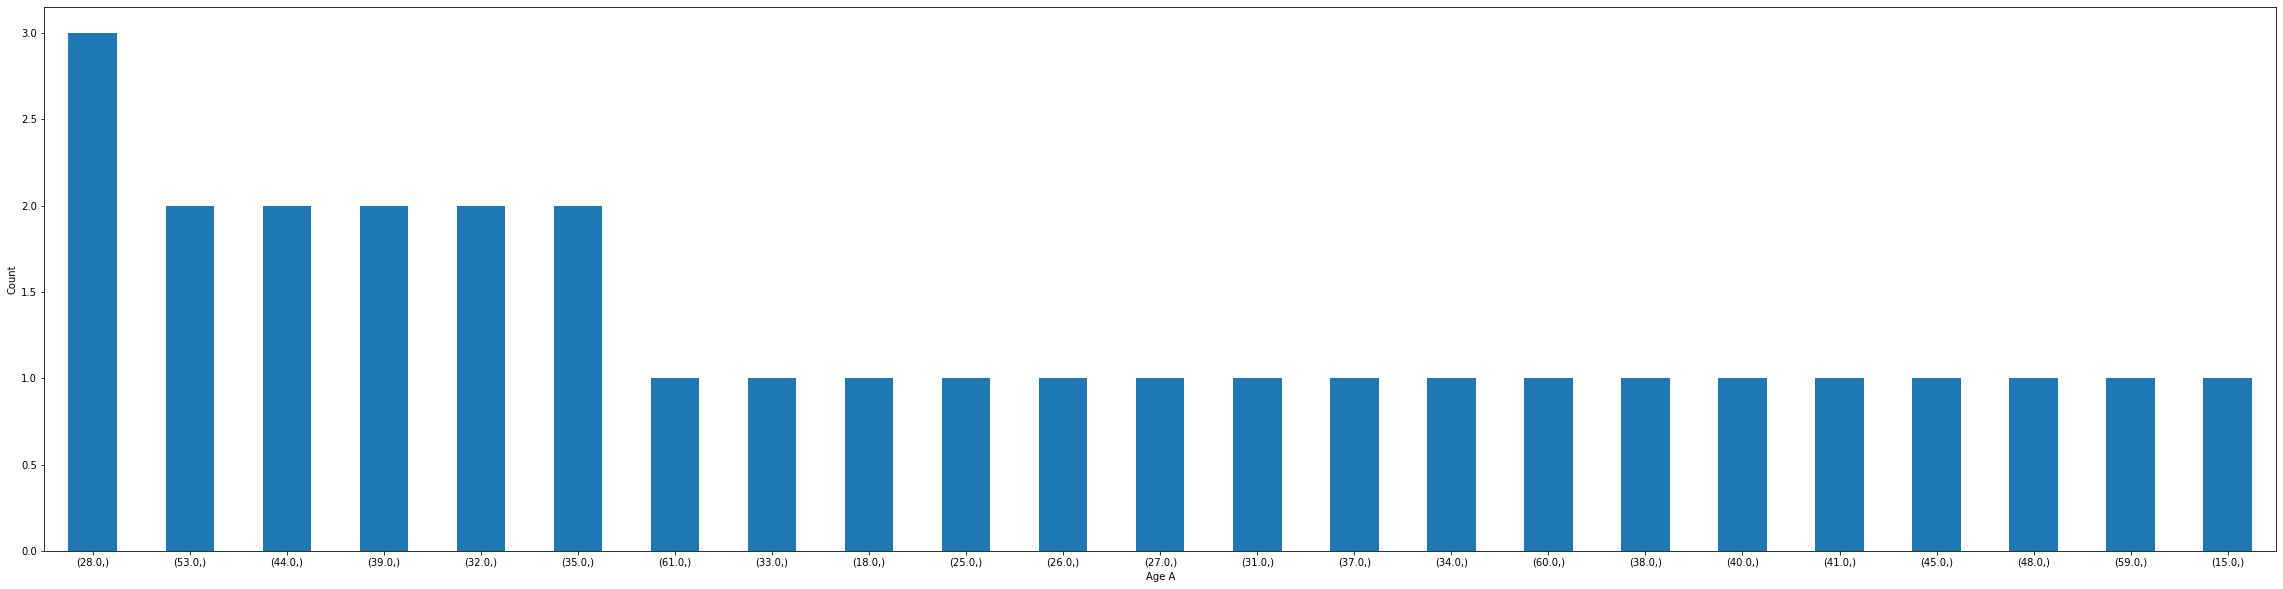

In [ ]:
plt.figure(figsize=(40,10))

ax=train[train['race']=='A'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age A")
ax.set_ylabel("Count")

#### Race W

In [ ]:
train[train['race']=='W']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2249,Daniel D. Rogers,23/01/17,shot,unarmed,27.0,M,W,Springfield,IL,True,attack,Not fleeing,True
2017,2251,Bruce Altenburger,23/01/17,shot,gun,60.0,M,W,Wilmington,DE,True,other,Not fleeing,False
2020,2247,Dakota A. Lukecart,24/01/17,shot,unarmed,22.0,M,W,Sugar Creek,MO,False,other,Car,False
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,W,Algoma Township,MI,True,attack,Not fleeing,False


Text(0, 0.5, 'Count')

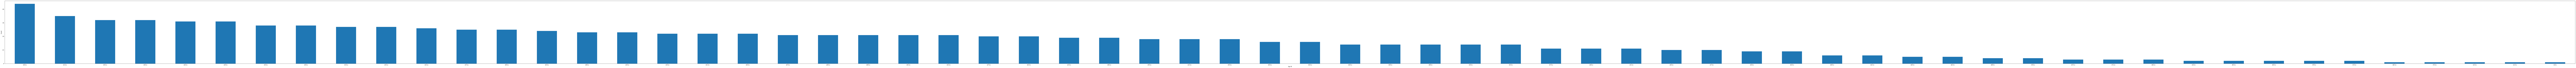

In [ ]:
plt.figure(figsize=(400,10))

ax=train[train['race']=='W'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age W")
ax.set_ylabel("Count")

#### Race H

In [ ]:
train[train['race']=='H']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
20,325,Andy Martinez,09/01/15,shot,gun,33.0,M,H,El Paso,TX,False,attack,Not fleeing,False
22,43,Brian Barbosa,11/01/15,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2246,Josue Gallardo,24/01/17,shot,gun,34.0,M,H,Atascadero,CA,False,other,Not fleeing,False
2022,2255,Antonio Arturo Perez Garcia,24/01/17,shot,gun,27.0,M,H,Bakersfield,CA,False,attack,Other,False
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,H,Las Cruces,NM,True,attack,Foot,True
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,H,Lancaster City,PA,False,attack,Not fleeing,False


Text(0, 0.5, 'Count')

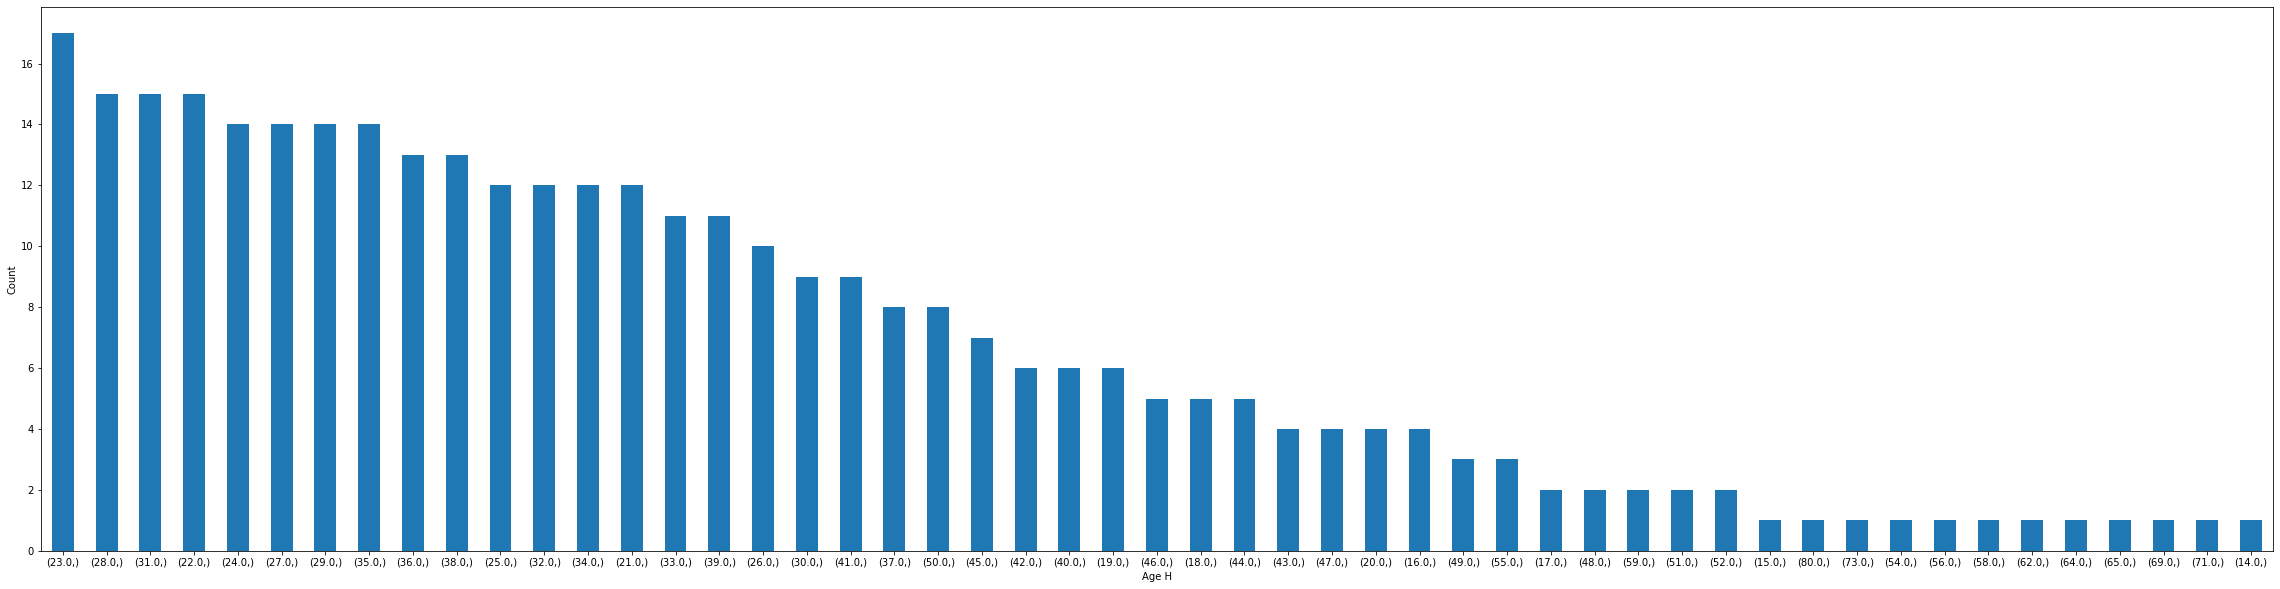

In [ ]:
plt.figure(figsize=(40,10))

ax=train[train['race']=='H'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age H")
ax.set_ylabel("Count")

#### Race B

In [ ]:
train[train['race']=='B']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False
11,21,Ron Sneed,07/01/15,shot,gun,31.0,M,B,Freeport,TX,False,attack,Not fleeing,False
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,B,Columbus,OH,True,other,Not fleeing,False
14,27,Omarr Julian Maximillian Jackson,07/01/15,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True
17,36,Artago Damon Howard,08/01/15,shot,unarmed,36.0,M,B,Strong,AR,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2243,Marquis Thomas,18/01/17,shot,gun,19.0,M,B,Gary,IN,False,attack,Car,False
2009,2237,Ronnie Lee Shorter,21/01/17,shot,gun,44.0,M,B,Greenville,MS,False,attack,Not fleeing,False
2012,2234,Christopher Thompkins,22/01/17,shot,gun,57.0,M,B,Pittsburgh,PA,False,attack,Not fleeing,False
2018,2253,Armond Brown,23/01/17,shot and Tasered,knife,25.0,M,B,Kenner,LA,True,other,Not fleeing,False


Text(0, 0.5, 'Count')

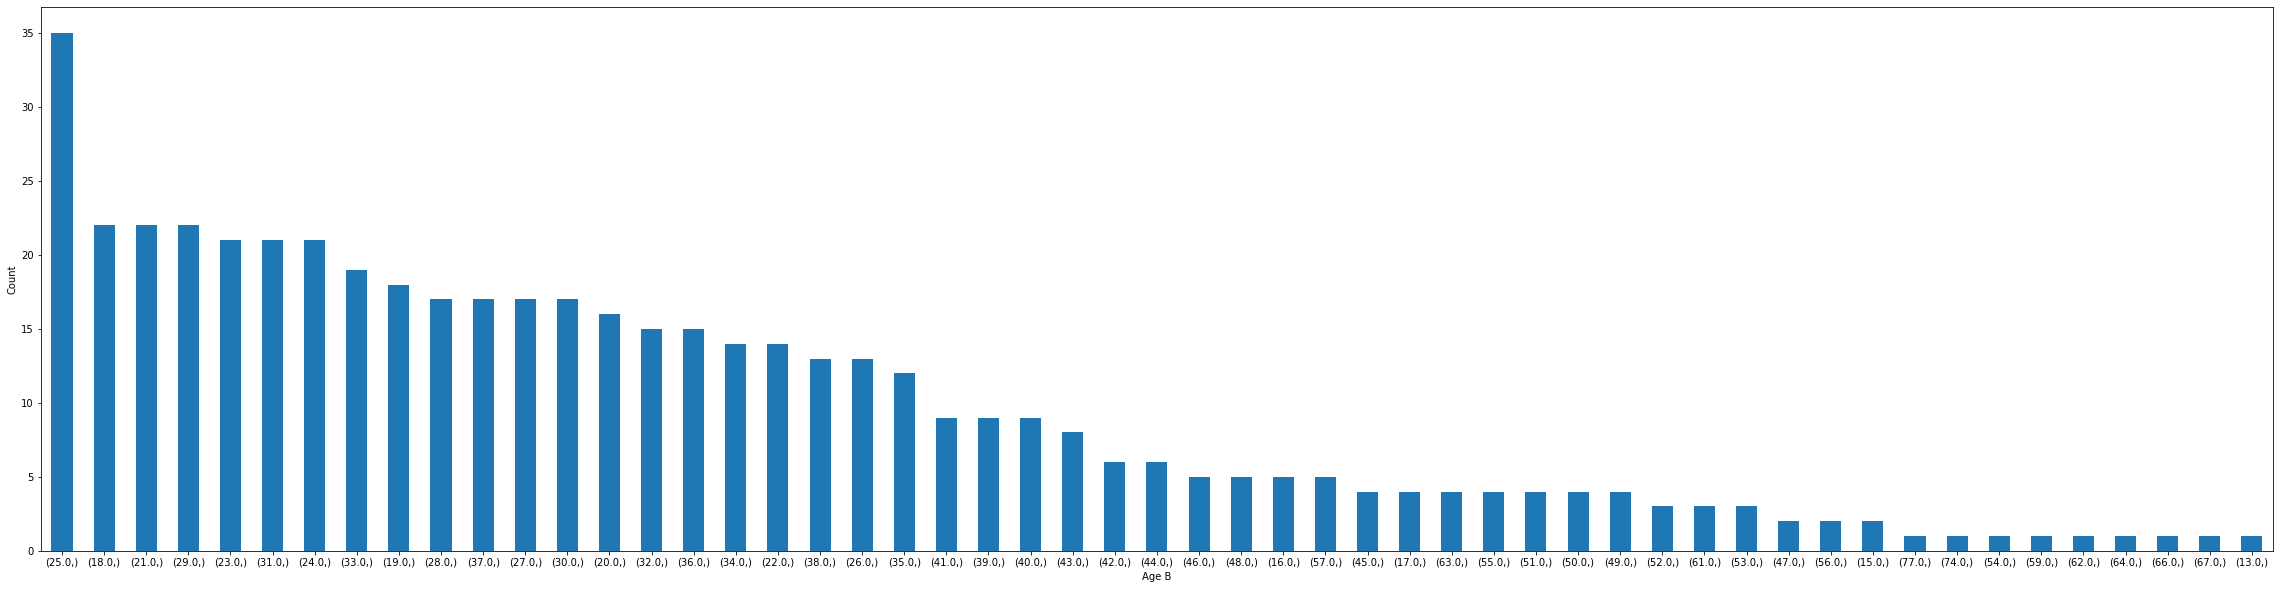

In [ ]:
plt.figure(figsize=(40,10))

ax=train[train['race']=='B'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age B")
ax.set_ylabel("Count")

#### Race O

In [ ]:
train[train['race']=='O']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
38,68,Zaki Shinwary,16/01/15,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False
327,418,Fridoon Zalbeg Nehad,30/04/15,shot,unarmed,42.0,M,O,San Diego,CA,True,other,Not fleeing,True
332,428,Nadir Soofi,03/05/15,shot,gun,34.0,M,O,Garland,TX,False,attack,Not fleeing,False
352,449,Bruce Zalonka,12/05/15,shot and Tasered,gun,46.0,M,O,Honolulu,HI,False,attack,Not fleeing,False
387,491,Feras Morad,27/05/15,shot and Tasered,unarmed,20.0,M,O,Long Beach,CA,False,other,Not fleeing,False
524,649,Mohammad Youssef Abdulazeez,16/07/15,shot,gun,24.0,M,O,Chattanooga,TN,True,attack,Not fleeing,False
724,857,Robert Berger,23/09/15,shot,knife,48.0,M,O,Salt Lake City,UT,False,attack,Not fleeing,False
731,865,Philip Quinn,24/09/15,shot,screwdriver,30.0,M,O,St. Paul,MN,True,other,Not fleeing,False
754,895,Omar Ali,05/10/15,shot,unarmed,27.0,M,O,Akron,OH,False,other,Not fleeing,False
812,956,Kobvey Igbuhay,26/10/15,shot,unarmed,18.0,M,O,Tampa,FL,False,attack,Foot,False


Text(0, 0.5, 'Count')

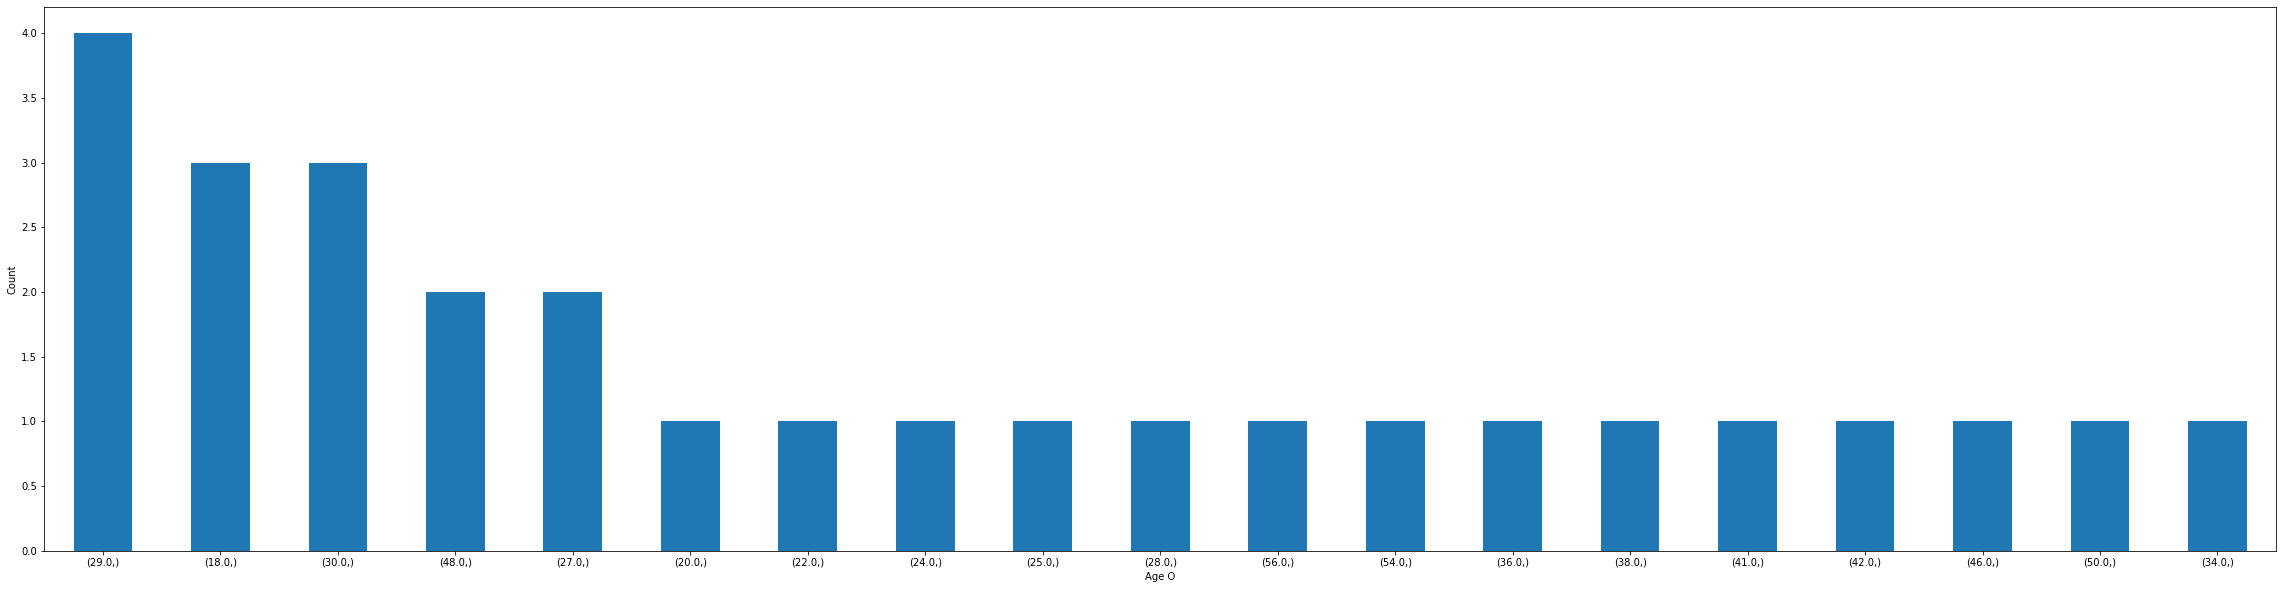

In [ ]:
plt.figure(figsize=(40,10))

ax=train[train['race']=='O'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age O")
ax.set_ylabel("Count")

#### Race N

In [ ]:
train[train['race']=='N']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.0,M,N,Phoenix,AZ,False,other,Not fleeing,False
211,531,Justin Fowler,20/03/15,shot,gun,24.0,M,N,Red Valley,AZ,False,attack,Car,False
296,393,Daniel Covarrubias,21/04/15,shot,unarmed,37.0,M,N,Lakewood,WA,True,other,Foot,False
438,563,Joe Charboneau,16/06/15,shot,gun,31.0,M,N,Wood Lake,ND,False,attack,Not fleeing,False
508,628,Paul Castaway,12/07/15,shot,knife,35.0,M,N,Denver,CO,True,other,Foot,False
525,656,Saige Hack,16/07/15,shot,gun,23.0,M,N,Cheyenne,WY,False,attack,Not fleeing,False
681,836,Tristan Vent,08/09/15,shot,gun,19.0,M,N,Fairbanks,AK,False,attack,Not fleeing,False
684,816,Vincent J. Perdue,09/09/15,shot,gun,33.0,M,N,Fairbanks,AK,False,attack,Car,False
742,877,Patrick Stephen Lundstrom,29/09/15,shot,blunt object,46.0,M,N,Rapid City,SD,False,attack,Not fleeing,False
1015,1166,Herman Bean,12/01/16,shot,knife,49.0,M,N,Spenard,AK,True,other,Not fleeing,False


Text(0, 0.5, 'Count')

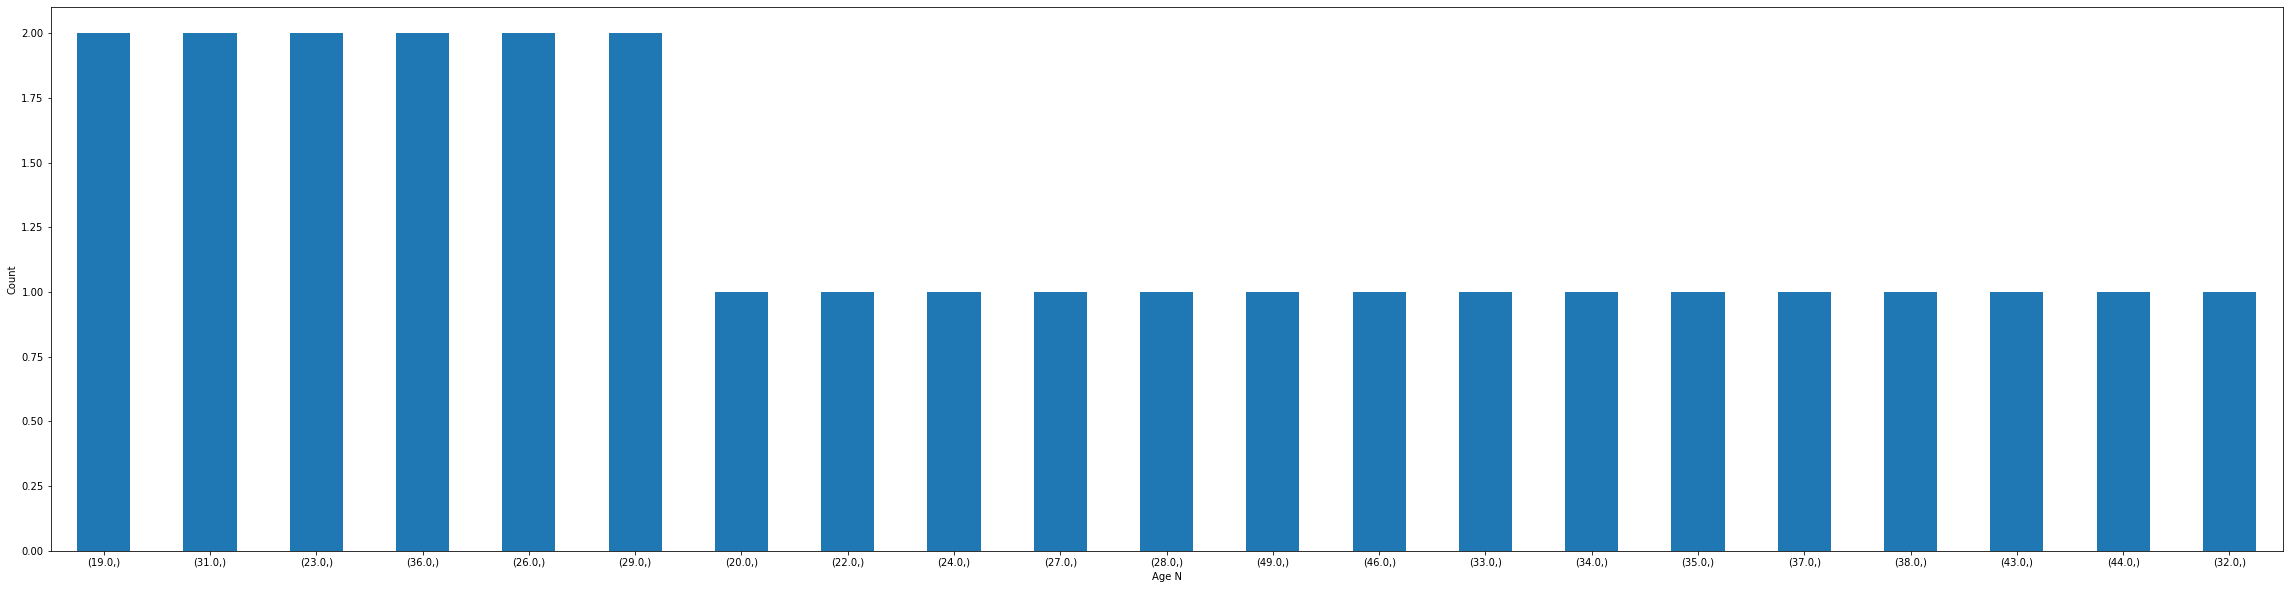

In [ ]:
plt.figure(figsize=(40,10))

ax=train[train['race']=='N'].value_counts(["age"]).plot(kind='bar', rot=0)
ax.set_xlabel("Age N")
ax.set_ylabel("Count")

### Race killed

In [ ]:
train.value_counts(["race"])

race
W       996
B       507
H       348
A        31
O        28
N        27
dtype: int64

### Race ratio

In [ ]:
killed_ratio=train['race'].value_counts(normalize=True) * 100
killed_ratio

W    51.419721
B    26.174497
H    17.965927
A     1.600413
O     1.445534
N     1.393908
Name: race, dtype: float64

In [ ]:
merged.describe()

,percent_completed_hs,Median Income,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29115.000000,29115.000000,29115.000000,29115.000000,29115.000000,29115.000000,29115.000000,29115.000000
mean,85.726993,51139.862514,16.447073,83.210472,6.840125,2.886832,1.540946,9.287658
std,11.812916,24159.593758,13.119634,21.661363,15.629311,12.703957,4.282965,17.475072
min,0.000000,4511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.000000,36250.000000,7.200000,78.500000,0.100000,0.100000,0.000000,1.200000
50%,88.400000,45643.000000,13.800000,92.500000,0.800000,0.300000,0.400000,2.900000
75%,93.500000,59313.469965,22.500000,96.900000,4.200000,0.900000,1.200000,8.000000
max,100.000000,244083.000000,100.000000,100.000000,100.000000,100.000000,67.100000,100.000000


In [ ]:
d = {'population': merged.drop(['percent_completed_hs','Median Income', 'poverty_rate'], axis = 1).describe()}
print(d)


{'population':         share_white   share_black  ...   share_asian  share_hispanic
count  29115.000000  29115.000000  ...  29115.000000    29115.000000
mean      83.210472      6.840125  ...      1.540946        9.287658
std       21.661363     15.629311  ...      4.282965       17.475072
min        0.000000      0.000000  ...      0.000000        0.000000
25%       78.500000      0.100000  ...      0.000000        1.200000
50%       92.500000      0.800000  ...      0.400000        2.900000
75%       96.900000      4.200000  ...      1.200000        8.000000
max      100.000000    100.000000  ...     67.100000      100.000000

[8 rows x 5 columns]}


## Machine Learning algo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


### Data Spliting

In [ ]:
Y_train = train["race"];
Y_train

0       A
1       W
2       H
3       W
4       H
       ..
2023    H
2024    W
2025    H
2026    H
2027    W
Name: race, Length: 2028, dtype: object

In [ ]:
X_train = train.drop(['race'], axis=1)
X_train

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,2256,Jeremy Lopez-Robledo,24/01/17,shot,knife,29.0,M,Las Cruces,NM,True,attack,Foot,True
2024,2257,Jonathan David Sper,24/01/17,shot,unarmed,30.0,M,Algoma Township,MI,True,attack,Not fleeing,False
2025,2258,Jose Efrain Rodriguez,24/01/17,shot and Tasered,gun,18.0,M,Lancaster City,PA,False,attack,Not fleeing,False
2026,2259,Ramon Milanez,24/01/17,shot,gun,32.0,M,Kuna,ID,False,attack,Car,False


In [ ]:
Y_test = test["race"]
Y_test 

0        B
1        W
2        H
3        W
4        B
      ... 
502    NaN
503    NaN
504    NaN
505      B
506      B
Name: race, Length: 507, dtype: object

In [ ]:
X_test = test.drop(['race'], axis=1)
X_test

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2261,Kevin Darnell Washington,25/01/17,shot,gun,54.0,M,Southaven,MS,False,attack,Not fleeing,False
1,2262,Donovan Paul Scheurich,25/01/17,shot,gun,50.0,M,Millston,WI,True,attack,Not fleeing,True
2,2265,Josue Javier Diaz,26/01/17,shot,gun,28.0,M,Charlotte,NC,False,other,Car,False
3,2266,Kerry Lee Coomer,26/01/17,shot,gun,59.0,M,Overlea,MD,True,attack,Not fleeing,True
4,2267,Deaundre Phillips,26/01/17,shot,undetermined,24.0,M,Atlanta,GA,False,other,Car,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,Kansas City,MO,False,attack,Not fleeing,False
503,2813,TK TK,28/07/17,shot,vehicle,NaN,M,Albuquerque,NM,False,attack,Car,False
504,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,Melba,ID,False,attack,Car,False
505,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,Oshkosh,WI,False,attack,Car,True


In [ ]:
X_train.shape, Y_train.shape

((2028, 13), (2028,))

In [ ]:
X_test.shape, Y_test.shape

((507, 13), (507,))

### Logistic Regression

In [ ]:
LogReg = LogisticRegression()